In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [34]:
df = pd.read_csv('/content/creditcard.csv')

In [35]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31775,36510,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,...,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90,0.0
31776,36512,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,...,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79,0.0
31777,36513,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,...,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12,0.0
31778,36513,-0.274278,1.004565,1.336430,-0.164777,0.404935,-0.418731,0.853252,-0.148772,-0.546969,...,-0.277437,-0.579135,-0.097793,-0.037926,-0.157882,0.044814,0.078376,-0.137035,9.72,0.0


In [36]:
df.shape

(31780, 31)

In [37]:
df = df.drop(['Time','Class'],axis=1)

In [38]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31775,1.497714,-0.874208,0.004261,-1.537368,-1.044513,-0.733905,-0.644635,-0.186510,-2.380495,1.602939,...,-0.288000,-0.527761,-1.248016,0.145825,-0.061193,0.250252,-0.526898,0.003761,0.007950,24.90
31776,-0.407854,0.940336,1.533733,-0.018123,-0.219400,-0.934602,0.597172,0.024610,-0.151850,-0.264386,...,-0.010277,-0.247570,-0.725830,-0.006221,0.322366,-0.249413,0.076587,0.255380,0.117340,1.79
31777,-0.434226,-3.705556,0.194223,0.139216,-2.066818,1.220137,-0.278115,0.281452,-0.161302,0.079242,...,1.697843,0.620431,0.040315,-0.690176,-0.226844,-0.123369,-0.291412,-0.080514,0.155457,861.12
31778,-0.274278,1.004565,1.336430,-0.164777,0.404935,-0.418731,0.853252,-0.148772,-0.546969,-0.147325,...,0.244366,-0.277437,-0.579135,-0.097793,-0.037926,-0.157882,0.044814,0.078376,-0.137035,9.72


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
df.dropna(inplace=True)
scaler = StandardScaler()
df = scaler.fit_transform(df)
x_train,x_test = train_test_split(df,test_size=0.2)

In [41]:
x_train.shape

(25423, 29)

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D   ,   Input

Epoch 1/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9639 - val_loss: 0.7813
Epoch 2/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8152 - val_loss: 0.6927
Epoch 3/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7432 - val_loss: 0.6553
Epoch 4/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6769 - val_loss: 0.6265
Epoch 5/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6800 - val_loss: 0.6143
Epoch 6/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6786 - val_loss: 0.5900
Epoch 7/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6422 - val_loss: 0.5853
Epoch 8/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6512 - val_loss: 0.5887
Epoch 9/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6479 - val_loss: 0.5723
Epoch 10/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6248 - val_loss: 0.5634
Epoch 11/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6114 - val_loss: 0.5528
Epoch 12/20
848/848 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

<Axes: >

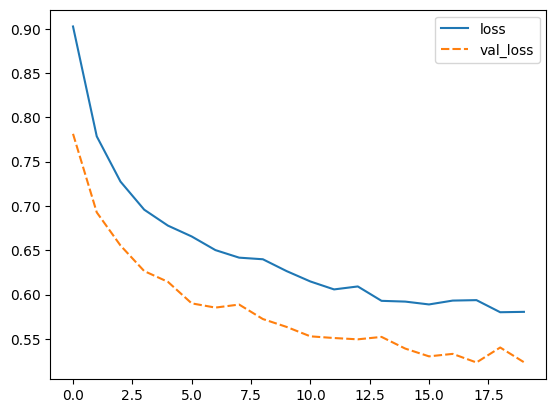

In [45]:
from sklearn.utils.validation import validate_data
model = Sequential(
    [
        #encoder
        Input(shape=(x_train.shape[1],)),
        Dense(32,activation='relu'),
        Dropout(0.2),
        Dense(16,activation='relu'),
        Dropout(0.2),
        Dense(8,activation='relu'),

        #decoder

        Dense(16,activation='relu'),
        Dropout(0.2),
        Dense(32,activation='relu'),
        Dense(x_train.shape[1], activation='linear')
    ]
)

model.compile(optimizer='adam', loss ='mean_squared_error')

model.fit(x_train
          ,x_train # Autoencoder trains by reconstructing the input
          ,epochs=20
          ,validation_data=(x_test,x_test) # Autoencoder validates by reconstructing the input
          ,batch_size=30,
          shuffle=True)

import seaborn as sns
sns.lineplot(model.history.history)

In [46]:
predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
threshold

np.float64(1.1625345535954539)

In [48]:
anomalies = mse > threshold

In [49]:
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 318


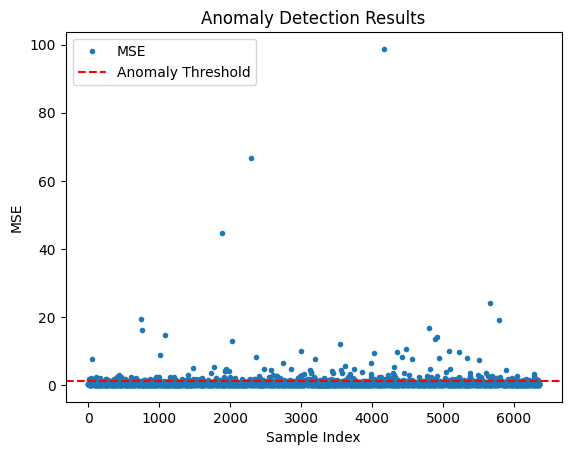

In [52]:
import matplotlib.pyplot as plt

plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

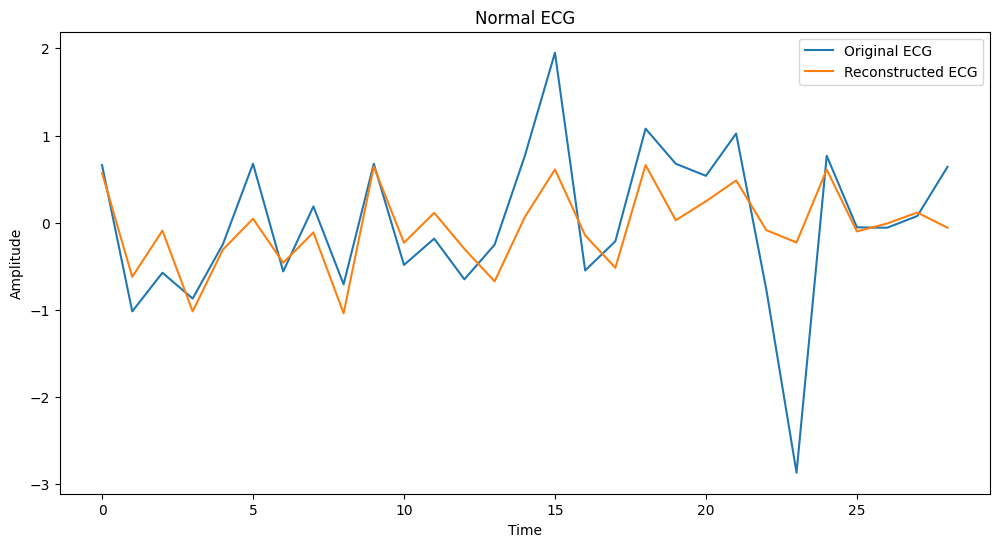

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(x_test[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

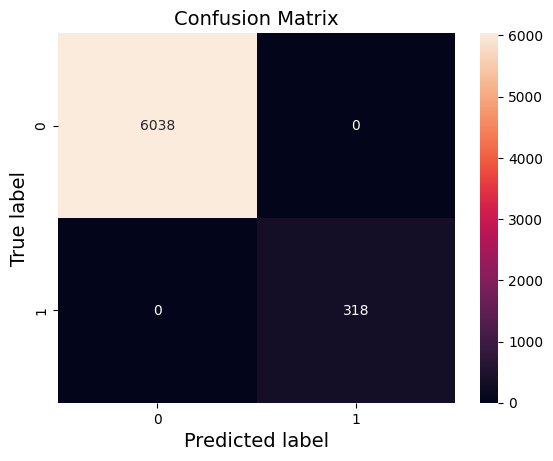

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, fmt = 'd')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.show()